# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [12]:
data.shape

(3864, 19)

In [13]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [14]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

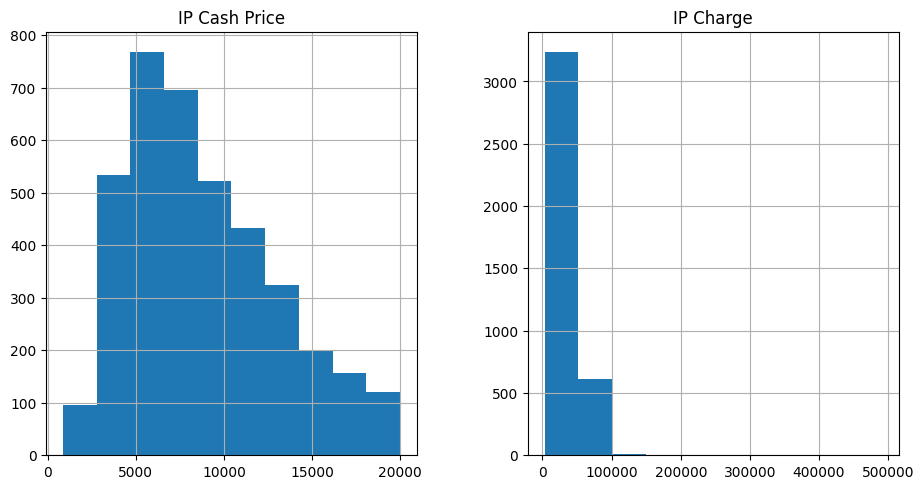

In [15]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

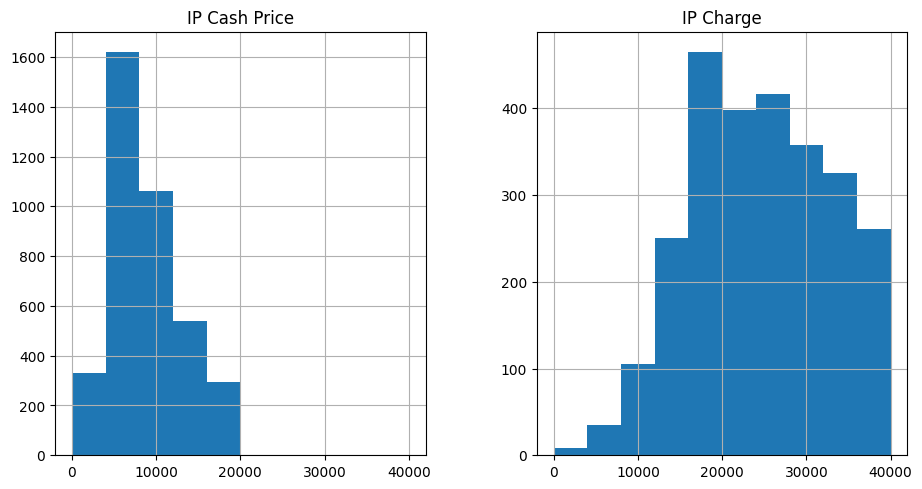

In [16]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [17]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:
What i observed from the above histogram
1. IP Cash price histogram.
2. IP Charge histogram.
3. IP Cash price histogram. (0,40000 Range)
4. IP Charge histogram.(0,40000 Range)

The vast majority of the data points fall within the range of 0 to 10000. once the cash price exceeds $10000 the frequency gradually decreases the majority of the data points are in the range 1 to 10000 and the IP Cash price distribution is right skewed.




---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

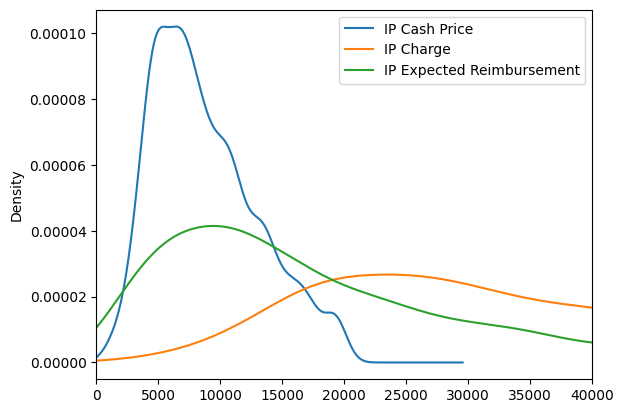

In [18]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
My conclusions about the pattern
IP Cash price:
As the prominent peak indicates, the majority of treatments costs typically costs  when paid for out of pocket. less treatment are far more expensive than this and the density decreases as the price rises particurly above $10000.

IP Charge:
since this is the point where the curve peaks, hospitals typically send insurance companies billing for  sums around $15000.

Insurance companies are charged a wide range of amounts, with same procedures costing much more or much less than this peak value.
IP Expected reimbursement:
Insurance companies typically reimburse hospitals  with a peak reimbursement amount slightly exceeding $10000.As the quantity rinses the density gradually decreases, indicating that certain procedures are less common and for which hospitals anticipate greater reimbursement.
conclusions:
1. Patient often forkup less money out of pocket than hospitals do from insurance carriers. This could occur for a number of reasons such as hospitals anticipating a reduction in the amount that is charged by innsurance companies or it could be a tactic to get patients to pay cash.
2. Hospitals expect less from insurance companies in terms of payment than what is actually charged this implies that hospitals should be prepared to bargain and settle for less than what they were orginally charged.
3. There is more variation in the amounts paid to insurance companies than there is in the cost paid out of pocket. the wider distribution of the IP charge distribution in comparison to the IP cash price indicates this.
4. The discrepancy between the initial hospital charges and the anticipated reimbursement implies that insurance companies have substantial bargaining power or have pre-agreed rather that are less than the original charges.


---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [19]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [20]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

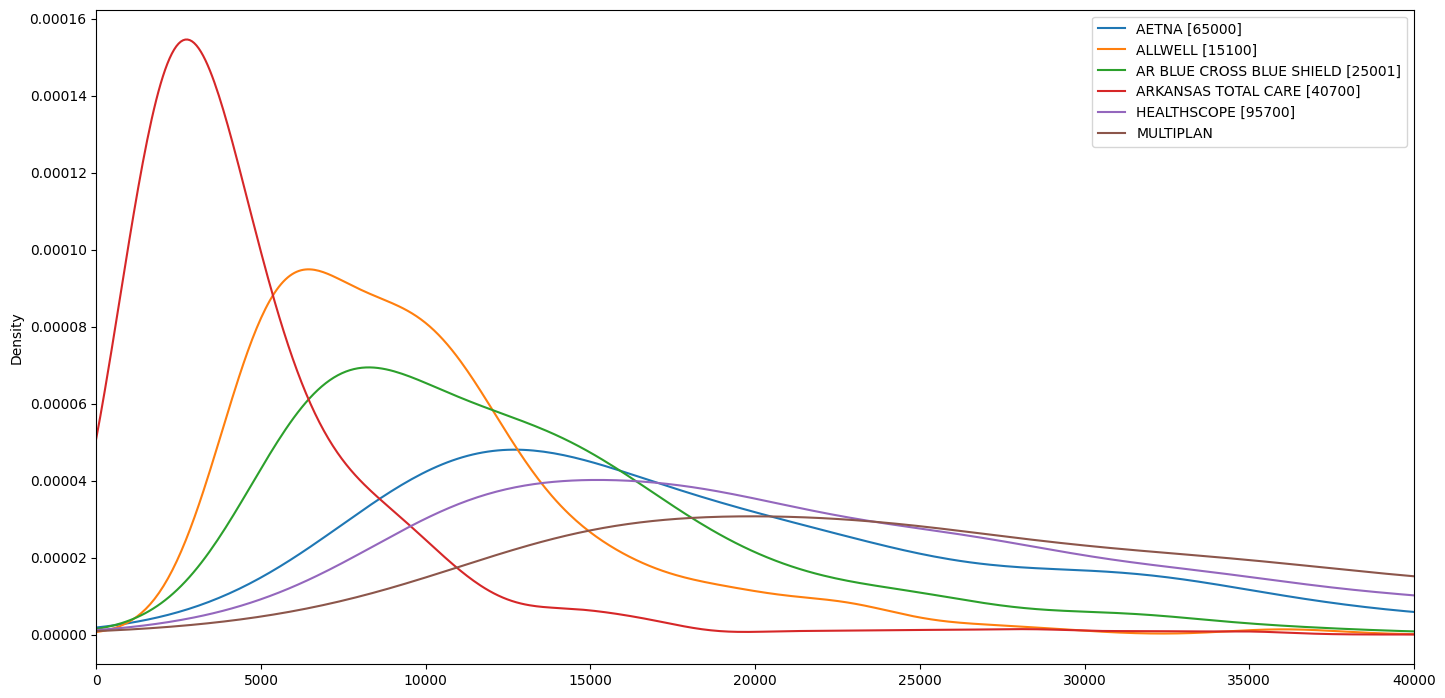

In [21]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:
AETNA 65000:
The most common refund amount from AETNA Which is a the pinnacle of the distribution for the company. The distribution  suggesting that very few services receive AETNA reimbursement beyond this threshold.
ALLWELL (15100):
The average reimbursement from ALLWELL is just over $7500, Gradually declining distribution indicates a wide range of reimbursement amounts.
AR BLUE CROSS BLUE SHIELD (25001):

In comparison to ALLWELL:AR BLUE Cross is a little flatter, with a peak at $7500. A greater variety of reimbursement values are covered by it including some more expensive services.
AR KANSAS TOTAL CARE (40700):

AETNA, ARKANSAS total care sees a sharp rise at approximately $5000 suggesting that a sizable portion of services have this reimbursement threshold. The curve rapidly declines from the apesc, indicating a decrease in high cost reimbursement.
HEALTH SCOPE (95700):

This distribution of health scope peaks at $10000 it becomes more equally distributed, indicating that people pay for a wider variety of services at various lost points.
MULTIPLAN:

In comparision to other curves, multiplans is flatter and broader. The typical reimbursement amount is approximately $10000; however the curve indicates that they pay for a wide range of services at various price ranges.
AETNA AND ARKANSAS TOTAL CARE:
These two plans exhibit comparable trends, with aetna having slightly greater variability and the majority of reimbursement falling toward the lower end. This could indicate that they bargain more for reducing costs or that the services covered by these policies are often less expensive.
The reimbursement ranges for AR Blue Cross Blue shield and all well are both wider, peaking in the mid price bracket. They may provide a wider range of coverage, encompassing both expensive and low cost services.

HEALTH SCOPE AND MULTIPLAN:
These plans offer a wide range of services and seem to be more flexible with regard to reimbursement levels. In comparision to multiplan, Health Scope appears to offer greater reimbursements at higher pricing point.


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

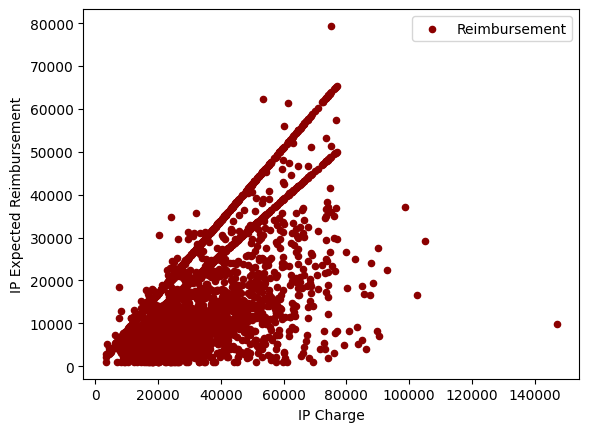

In [22]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

<ipython-input-23-7b284550e202>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


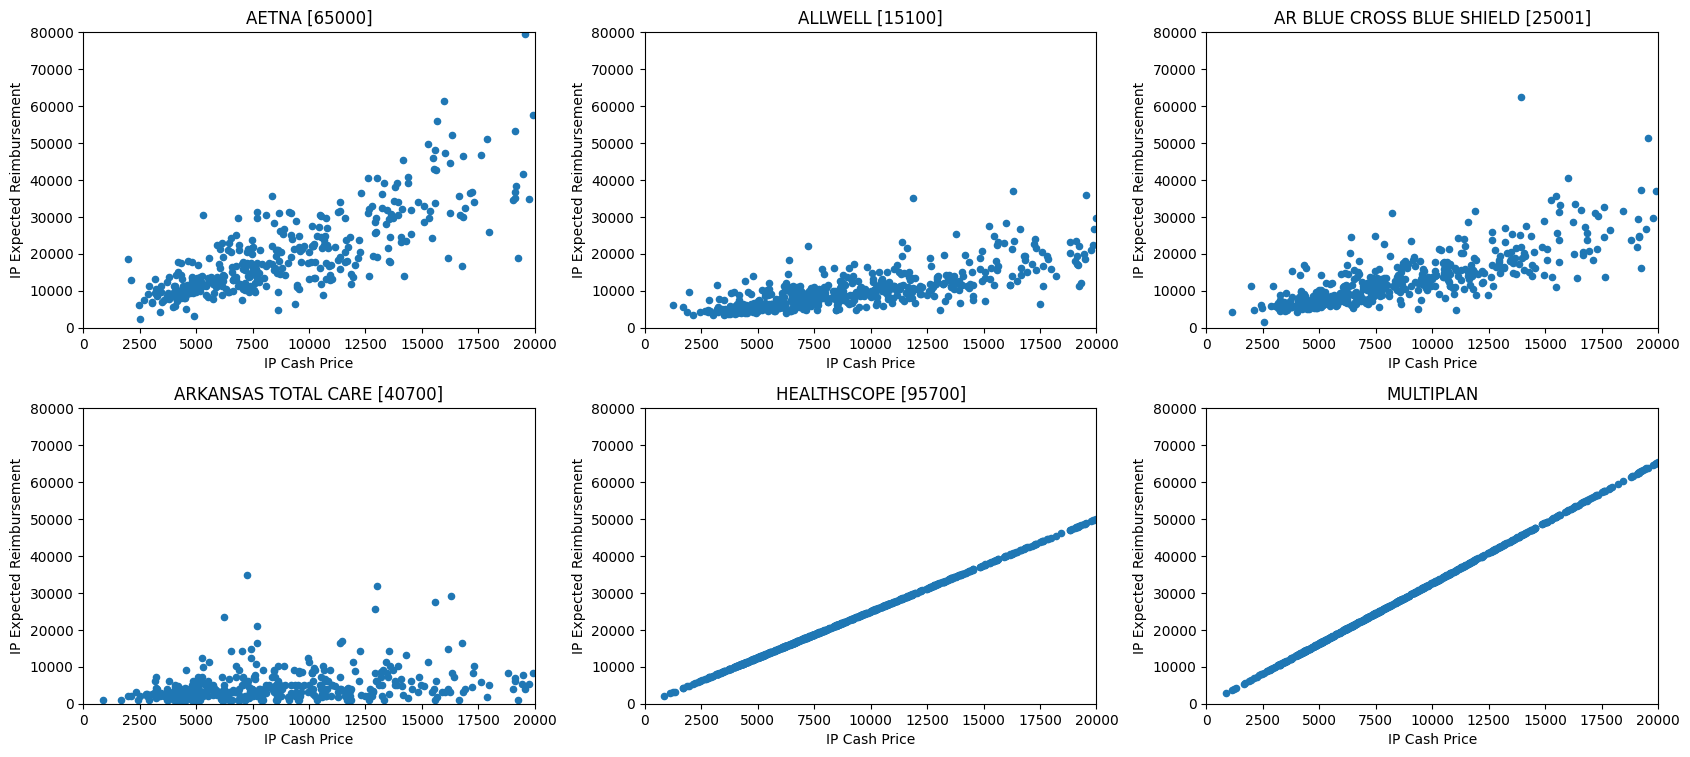

In [23]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:
SCATTER POLT OF TOTAL REIMBURSEMENT VERSUS IP CHARGE:
IP expected reimbursement and IP charge appear to be positively correlated : The IP expected reimbursement often rise in tandem with the IP charge.
The fact that the relationship is not linear and that there are several data concenterations or brands raises the possibility that additional variables, such as various reimbursements rates.
PARTS:
The IP cash price and the IP expected reimbursement have a positive but erratic link for the majority of payers including AETNA, ALL WELL, AR BLUE, Cross Blue Shield; and ARKANSAS Total Care. The points are widely scattered and there is not much of a correlation.
A stronger linear correlation is seen in health scope suggesting a direct relationship between IP cash price and IP expected reimbursement.
The very strong linear correlation shown by multiplan indicates a close relationship between the cash price and projected reimbursement for this payer.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [24]:
# Your code here to load data...
import pandas as pd
df = pd.read_csv("salary_data.csv")
print(df.head())
#Here i Took salary_data from kaggle

     country_name continent_name wage_span  median_salary  average_salary  \
0     Afghanistan           Asia   Monthly         853.74         1001.15   
1   Aland Islands         Europe   Monthly        3319.24         3858.35   
2         Albania         Europe   Monthly         832.84          956.92   
3         Algeria         Africa   Monthly        1148.84         1308.81   
4  American Samoa        Oceania   Monthly        1390.00         1570.00   

   lowest_salary  highest_salary  
0         252.53         4460.97  
1         972.52        17124.74  
2         241.22         4258.49  
3         330.11         5824.18  
4         400.00         6980.00  


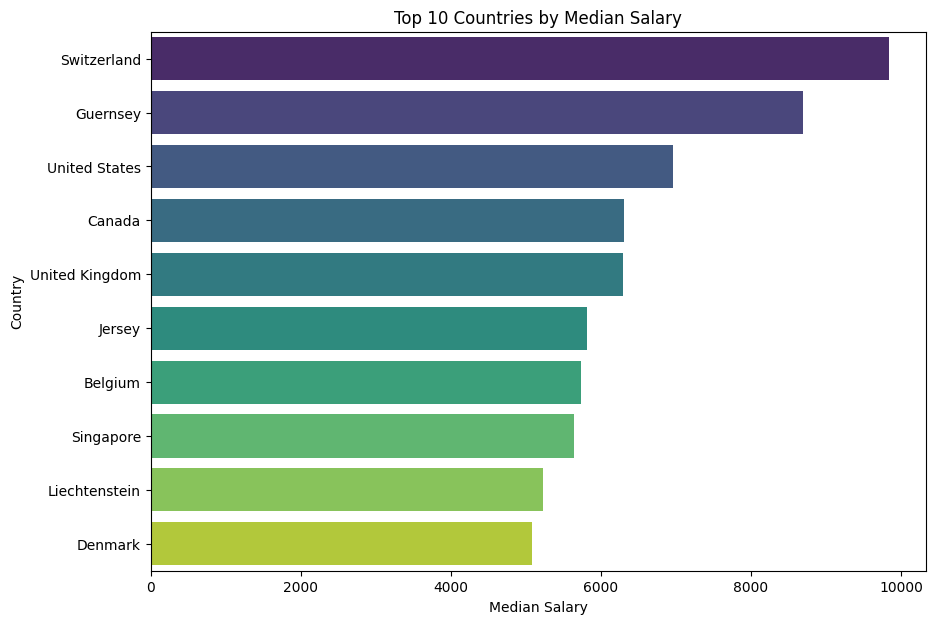

In [25]:
# Your code here to do a first visualization...
# Here I am vizualizing the Top 10 countries with highest Median salaries
# Here I am providing dataset link  "https://www.kaggle.com/datasets/zedataweaver/global-salary-data/""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Creating histogram for top 10 countries by median salary
top_10_countries = df.nlargest(10, 'median_salary')
plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_countries, y='country_name', x='median_salary', palette='viridis')
plt.title("Top 10 Countries by Median Salary")
plt.xlabel("Median Salary")
plt.ylabel("Country")
plt.show()


### Observations #1
The average incomes on each continent are displayed in a box plot. The highest median wage is found in Northern America, where its minimum value even exceeds the median salary found in numerous other continents. When it comes to median income values, Europe lags far behind. Asia and Africa have more modest median salaries, which are on the lower end. Significant pay differences between continents, such as those in Asia, Europe, and North America, are also revealed by the plot, as evidenced by the wide boxes and the existence of outliers. Salary ranges show greater constancy in the Caribbean, Central America, and South America.

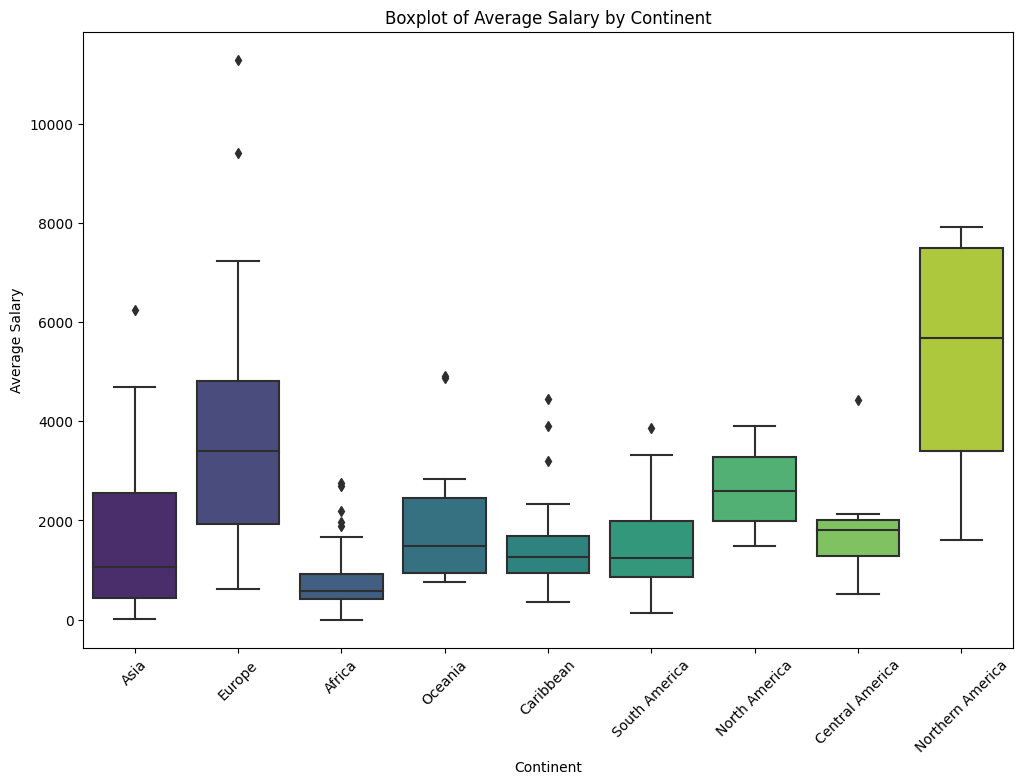

In [26]:
# More code here to do a second visualization...
# Creating boxplot of average salary by continant
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='continent_name', y='average_salary', palette='viridis')
plt.title("Boxplot of Average Salary by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

### Observations #2
The average incomes for each continent are shown in the chart. Compared to all other continents, Northern America has the highest average wage. Europe comes in second place. Africa, on the other hand, has the lowest average pay. The average salary in Asia, the Caribbean, and Central America is reasonable and comparable. South America and Oceania are positioned in the center, with Oceania somewhat ahead of South America. The average salary among the continents varies noticeably overall, with Europe and North America at the top of the group.



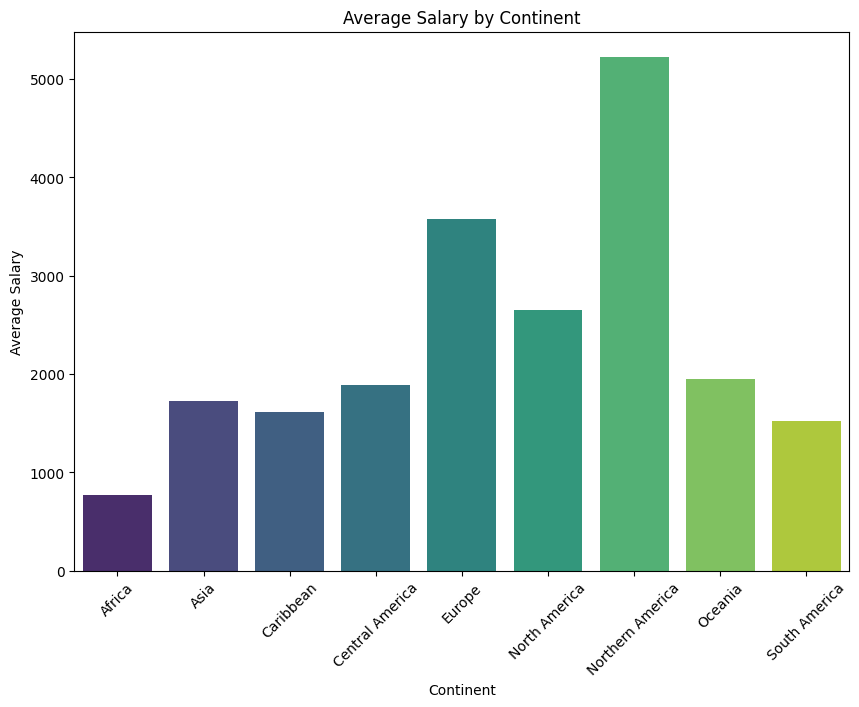

In [27]:
# Calculating the  average salary by continent
avg_salary_by_continent = df.groupby('continent_name')['average_salary'].mean().reset_index()

# Creating Visualization for average salary by continent
plt.figure(figsize=(10, 7))
sns.barplot(data=avg_salary_by_continent, x='continent_name', y='average_salary', palette='viridis')
plt.title("Average Salary by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option